In [1]:
import pandas as pd

### Знакомимся с новыми данными: коронавирус

#### Загружаем необходимые таблицы для работы

In [2]:
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [3]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 'people_vaccinated',
     'people_vaccinated_per_hundred', 'people_fully_vaccinated',
     'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


#### Предобработка данных

In [4]:
#Группируем таблицу по дате и названию страны
#и рассчитываем суммарные показатели по всем регионам
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
display(covid_data)

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0
...,...,...,...,...,...
86780,12/31/2020,Vietnam,1465.0,35.0,1325.0
86781,12/31/2020,West Bank and Gaza,138004.0,1400.0,117183.0
86782,12/31/2020,Yemen,2099.0,610.0,1394.0
86783,12/31/2020,Zambia,20725.0,388.0,18660.0


In [5]:
#Переводим даты в формат datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])
display(covid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       86785 non-null  datetime64[ns]
 1   country    86785 non-null  object        
 2   confirmed  86785 non-null  float64       
 3   deaths     86785 non-null  float64       
 4   recovered  86785 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 3.3+ MB


None

In [6]:
#Зафиксируем число больных на данный по факту 
#(без выздоровевших и умерших)
covid_data['active'] = (covid_data['confirmed'] - 
covid_data['deaths'] - covid_data['recovered'])
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0


In [7]:
#Создадим признак ежедневного прироста числа заболевших, 
#умерших и выздоровевших людей
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = (
    covid_data.groupby('country')['confirmed'].diff()
)
covid_data['daily_deaths'] = (
    covid_data.groupby('country')['deaths'].diff()
)
covid_data['daily_recovered'] = (
    covid_data.groupby('country')['recovered'].diff()
)
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
#В таблице vaccination_data преобразуемм столбцы в формат datetime
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              42795 non-null  object        
 1   date                                 42795 non-null  datetime64[ns]
 2   total_vaccinations                   23457 non-null  float64       
 3   people_vaccinated                    22371 non-null  float64       
 4   people_vaccinated_per_hundred        22371 non-null  float64       
 5   people_fully_vaccinated              19462 non-null  float64       
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64       
 7   daily_vaccinations                   42558 non-null  float64       
 8   vaccines                             42795 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.9+ MB


None

### Задание 3.1

In [9]:
display(covid_data['date'].min())
display(covid_data['date'].max())

Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

### Задание 3.2

In [10]:
display(vaccinations_data['date'].min())
display(vaccinations_data['date'].max())

Timestamp('2020-12-02 00:00:00')

Timestamp('2021-09-06 00:00:00')

### Задание 3.3

In [11]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
#display(covid_df.head())
#display(covid_df.tail())
display(covid_df.shape)

(86785, 16)

### Задание 3.4

In [12]:
covid_df['death_rate'] = (covid_df['deaths']/
covid_df['confirmed'])*100

covid_df['recover_rate'] = (covid_df['recovered']/
covid_df['confirmed'])*100


In [13]:
mask = covid_df['country'] == 'United States'
round(covid_df[mask].groupby('country')['death_rate'].max(), 2)

country
United States    7.19
Name: death_rate, dtype: float64

In [14]:
mask = covid_df['country'] == 'Russia'
round(covid_df[mask].groupby('country')['recover_rate'].mean(), 2)

country
Russia    67.06
Name: recover_rate, dtype: float64

## Графические возможности библиотеки Pandas

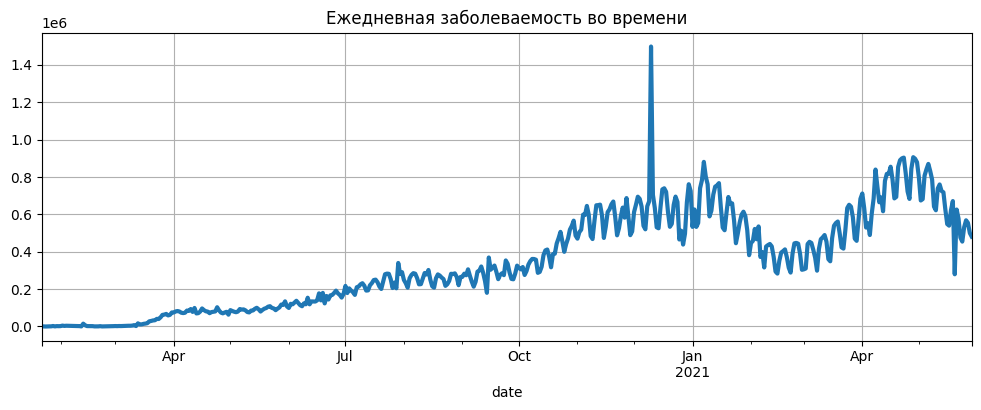

In [15]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
#Строим линейный график
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=3
);

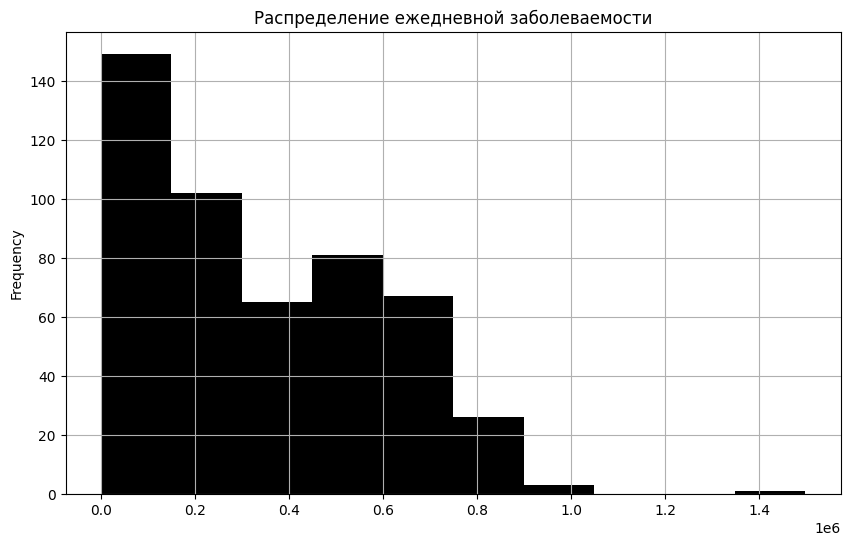

In [16]:
#Строим гистограмму
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='black',
    bins=10
);

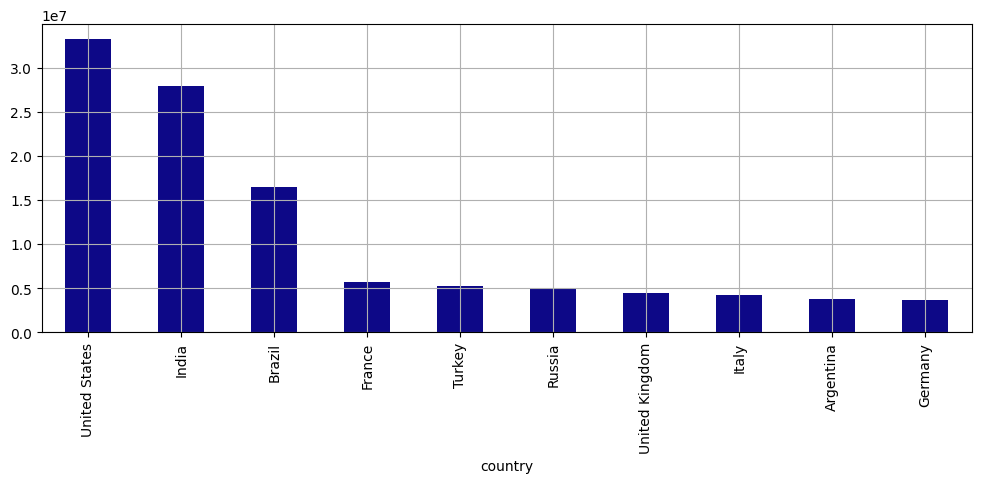

In [17]:
#Строим столбчатую диаграмму
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

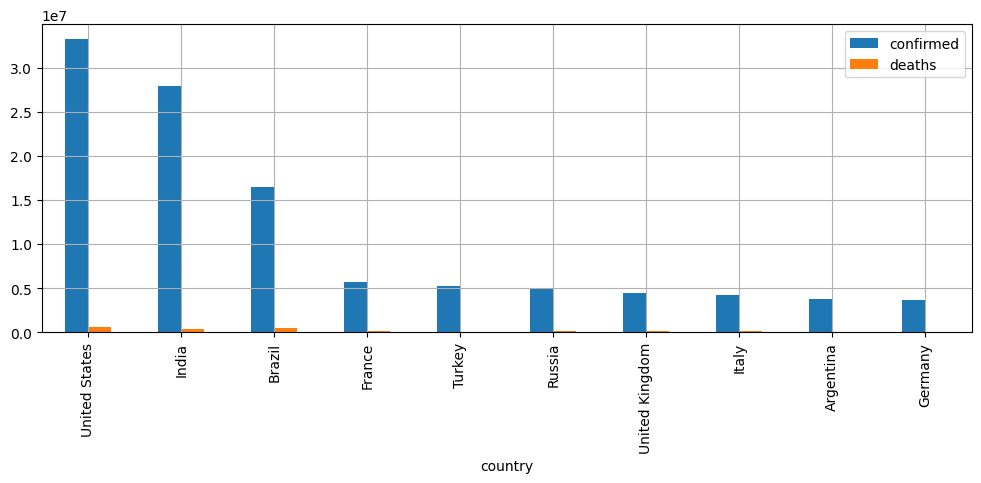

In [18]:
#Строим столбчатую диаграмму с двумя показателями
grouped_country = (covid_df.groupby(['country'])
[['confirmed', 'deaths']].last())
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12,4)
);


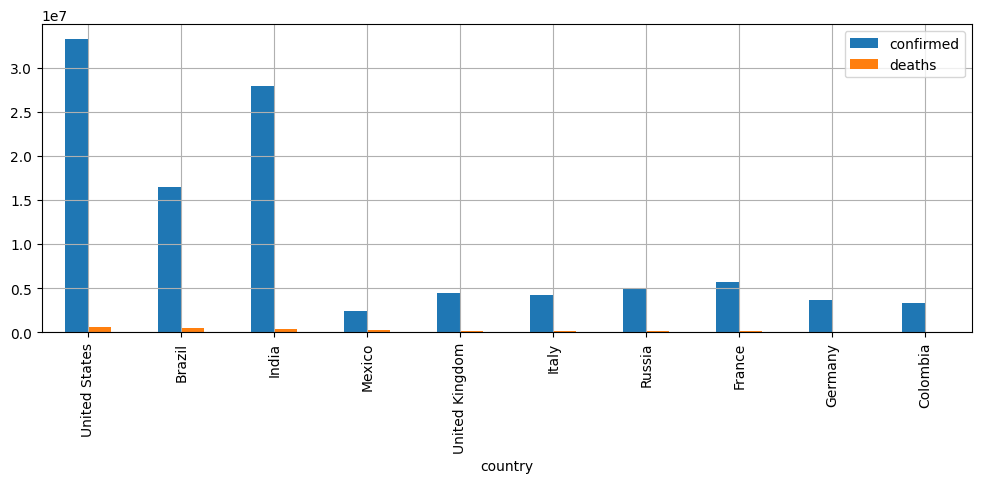

In [19]:
#График с сортировкой по смертям
grouped_country = (covid_df.groupby(['country'])
[['confirmed', 'deaths']].last())
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12,4)
);

### Задание 4.5

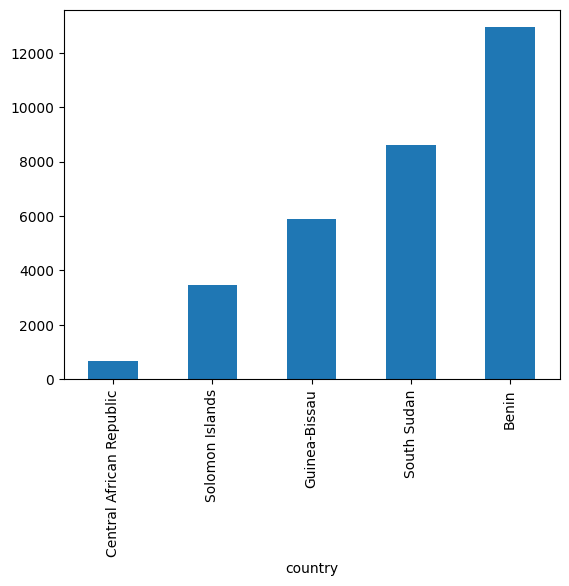

In [20]:
covid_df.groupby('country')['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

### Графические возможности библиотеки Matplotlib

In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

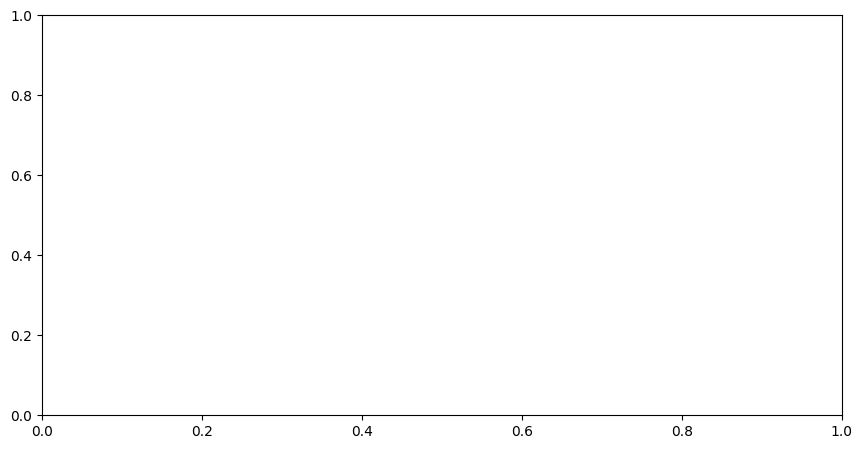

In [23]:
#Создадим фигуру для графика и добавим координаты
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0, 0, 1, 1])

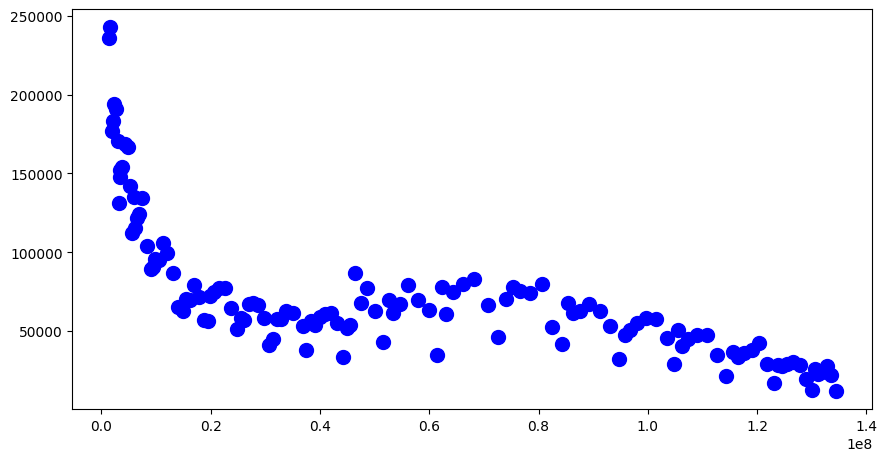

In [24]:
#Построим диаграмму рассеяния, которая покажет зависимость числа
#ежеднемно обнаруженных случаев заражения от общего количества 
#привитых вторым компонентом вакцины
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=100,
    marker='o',
    c = 'blue'
);

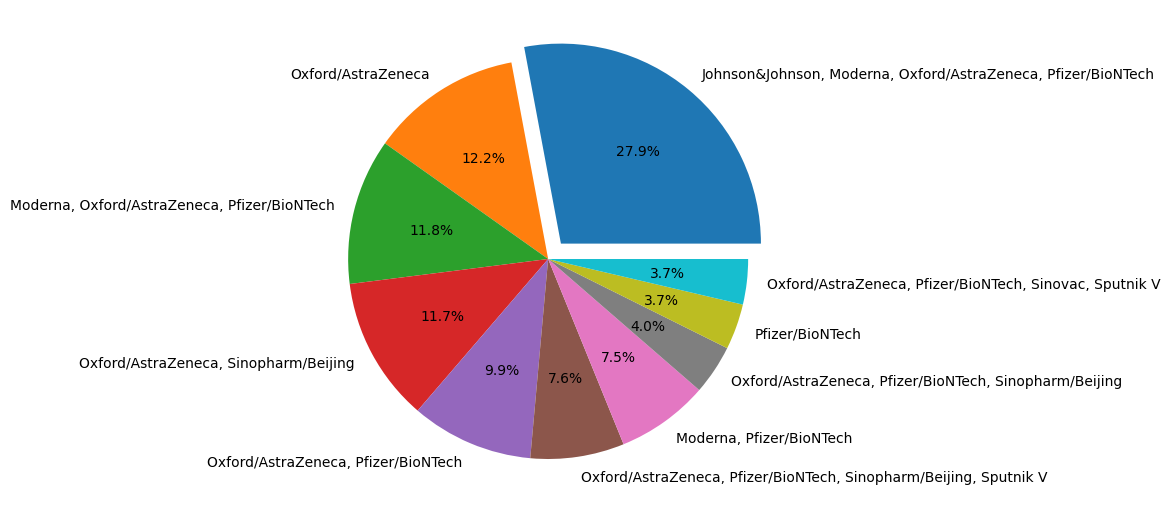

In [25]:
#Строим круговую диаграмму для ТОП-10 комбинаций вакцин в мире
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

In [26]:
#Для любознательных :D Корректная круговая диаграмма
#Очистка строк от пропусков
combination_not_nan = covid_df.dropna(subset = ['vaccines'])

In [27]:
#Полученные данные группируем по странам
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

In [28]:
#Удалим из строк с комбинациями пробелы и разделим комбинацию
#на отдельные состовляющие по запятым
combination_last = combination_last.apply(lambda x:
x.replace(' ', '').split(','))
display(combination_last)

country
Afghanistan    [Johnson&Johnson, Oxford/AstraZeneca, Pfizer/B...
Albania        [Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac,...
Algeria        [Oxford/AstraZeneca, Sinopharm/Beijing, SputnikV]
Andorra                    [Oxford/AstraZeneca, Pfizer/BioNTech]
Angola                                      [Oxford/AstraZeneca]
                                     ...                        
Venezuela         [Sinopharm/Beijing, Sinopharm/Wuhan, SputnikV]
Vietnam        [Moderna, Oxford/AstraZeneca, Pfizer/BioNTech,...
Yemen                                       [Oxford/AstraZeneca]
Zambia                   [Oxford/AstraZeneca, Sinopharm/Beijing]
Zimbabwe       [Oxford/AstraZeneca, Sinopharm/Beijing, Sinova...
Name: vaccines, Length: 174, dtype: object

In [29]:
#Создадим словарь в котором ключи это вакцина, 
#а значение - количество стран, которые используют вакцину
#Для заполнения словаря используем циклы
vaccines_dict = {}
for vaccines_list in combination_last:
    for vaccine in vaccines_list:
        if vaccine not in vaccines_dict:
            vaccines_dict[vaccine] = 1
        else:
            vaccines_dict[vaccine] += 1
print(vaccines_dict)

{'Johnson&Johnson': 45, 'Oxford/AstraZeneca': 149, 'Pfizer/BioNTech': 102, 'Sinopharm/Beijing': 66, 'Sinovac': 39, 'SputnikV': 48, 'Moderna': 58, 'Covaxin': 7, 'CanSino': 5, 'Sinopharm/Wuhan': 3, 'ZF2001': 2, 'Abdala': 1, 'Soberana02': 1, 'COVIranBarekat': 1, 'QazVac': 1, 'Sinopharm/HayatVax': 1, 'EpiVacCorona': 1, 'Medigen': 1}


In [30]:
#Преобразуем словарь в объект Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending = False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

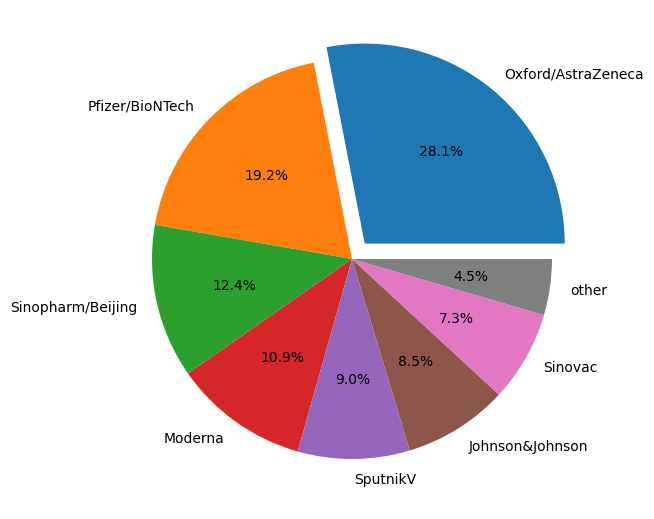

In [31]:
#Строим круговую диаграмму
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct = '%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0]
);

#### Добавление информативности в графики

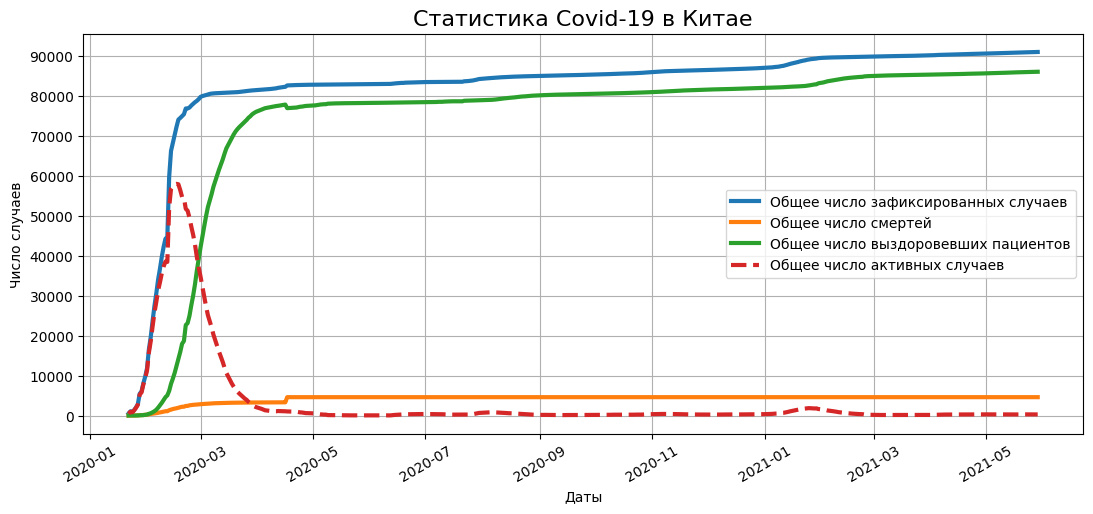

In [32]:
#Строим график роста общей заболеваемостиБ число смертей, 
#выздоровевших пациентов и активных случаев в Китае
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed',
'active', 'deaths', 'recovered']].sum()

fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], 
label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'],
label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'],
label = 'Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'],
label = 'Общее число активных случаев', lw=3, linestyle='dashed')

axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

#### Использование нескольких систем координат

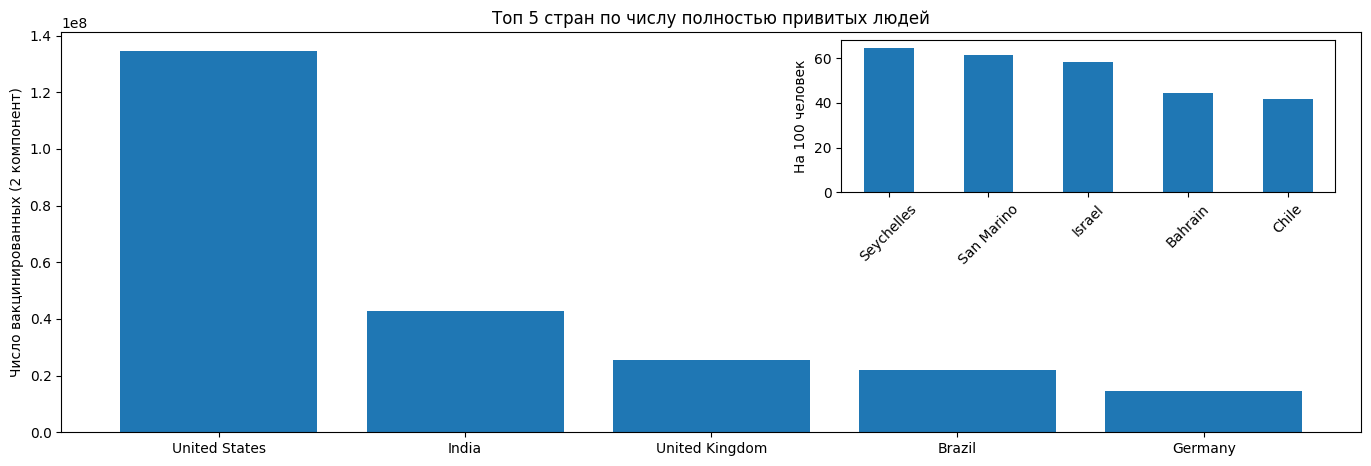

In [33]:
#Построим график с 2 системами координат
vacc_country = (covid_df.groupby('country')
['people_fully_vaccinated'].last().nlargest(5))
vacc_country_per_hundred = (covid_df.groupby('country')
['people_fully_vaccinated_per_hundred'].last().nlargest(5))

fig = plt.figure(figsize=(13,4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x=vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x=vacc_country_per_hundred.index, height =
vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

#### SUBPLOTS

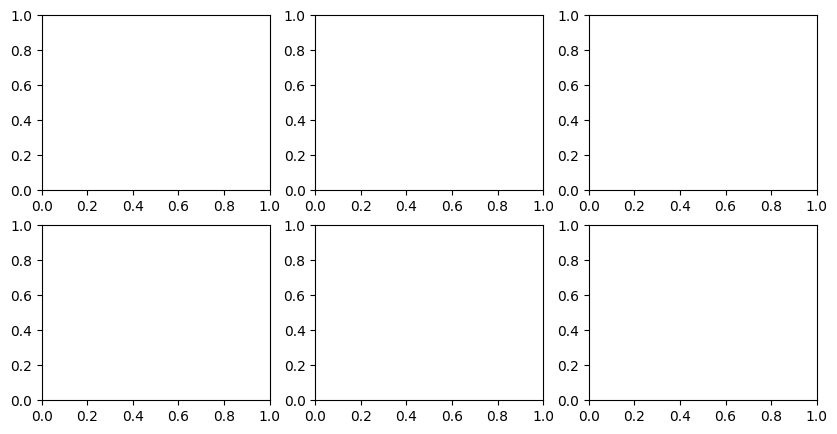

In [34]:
#Создадим 6 координатных проскостей, сведенных в таблицу
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

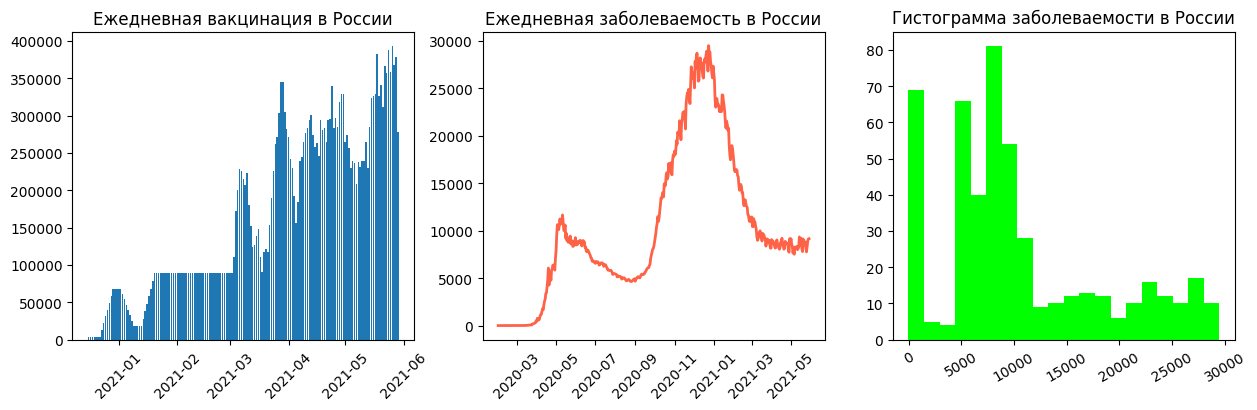

In [35]:
russia_data = covid_df[covid_df['country'] == 'Russia']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

axes[0].bar(
    x=russia_data['date'],
    height = russia_data['daily_vaccinations'],
    label='Число вакцинированных',
)
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

axes[1].plot(
    russia_data['date'],
    russia_data['daily_confirmed'],
    label='Число заболевших',
    color='tomato',
    lw=2,
)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

axes[2].hist(
    x=russia_data['daily_confirmed'], label=['Число заболевших'],
    color = 'lime', bins=20
)
axes[2].set_title('Гистограмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=30)

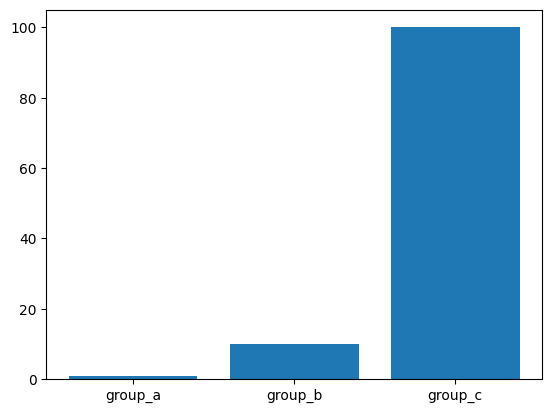

In [36]:
#Модульный подход
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

### Графические возможности библиотеки Seaborn

In [37]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 445.2 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 660.6 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 266.2/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [39]:
#Рассчитаем ежедневную заболеваемость на 100 человек в ряде стран
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population'] 
    )
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = (
croped_covid_df['daily_confirmed']/croped_covid_df['population']*100)
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


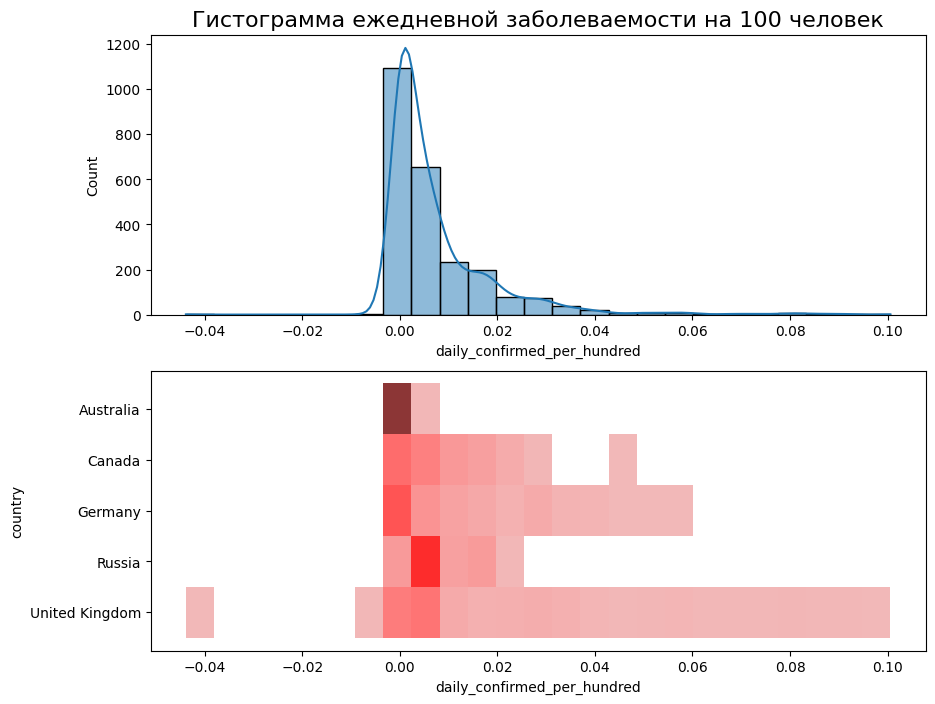

In [42]:
#Построим гистограмму по полученным данным
#Две гистограммы. Первая илюстрирует общее распределение 
#ежедневной заболеваемости. Вторая распределение в разрезе стран
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек',
fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

C:\Users\Андрей\AppData\Local\Temp\ipykernel_12952\2932360760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


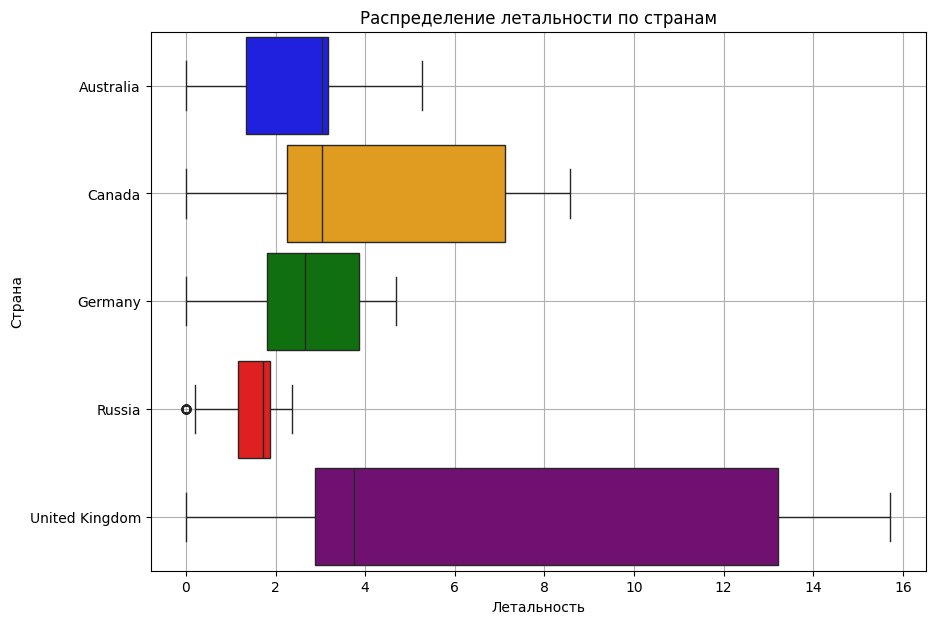

In [48]:
#Строим коробчатую диаграмму признака летальности
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9,
    palette=['blue', 'orange', 'green', 'red', 'purple']
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

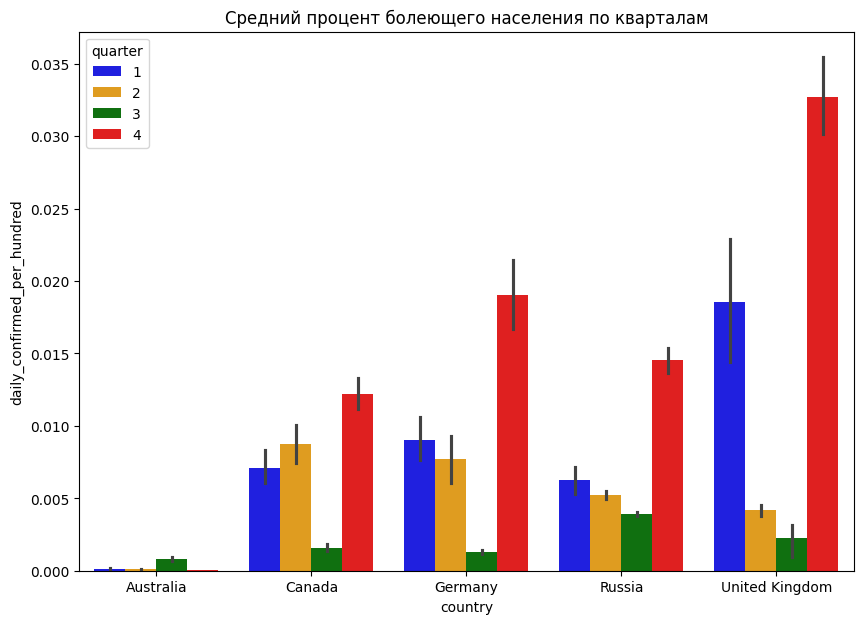

In [51]:
#Строим многоуровневую столбчатую диаграмму для простомтра среднего 
#ежедневного процента заболевших по кварталам
fig = plt.figure(figsize=(10,7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
    palette=['blue', 'orange', 'green', 'red']
)
barplot.set_title('Средний процент болеющего населения по кварталам');

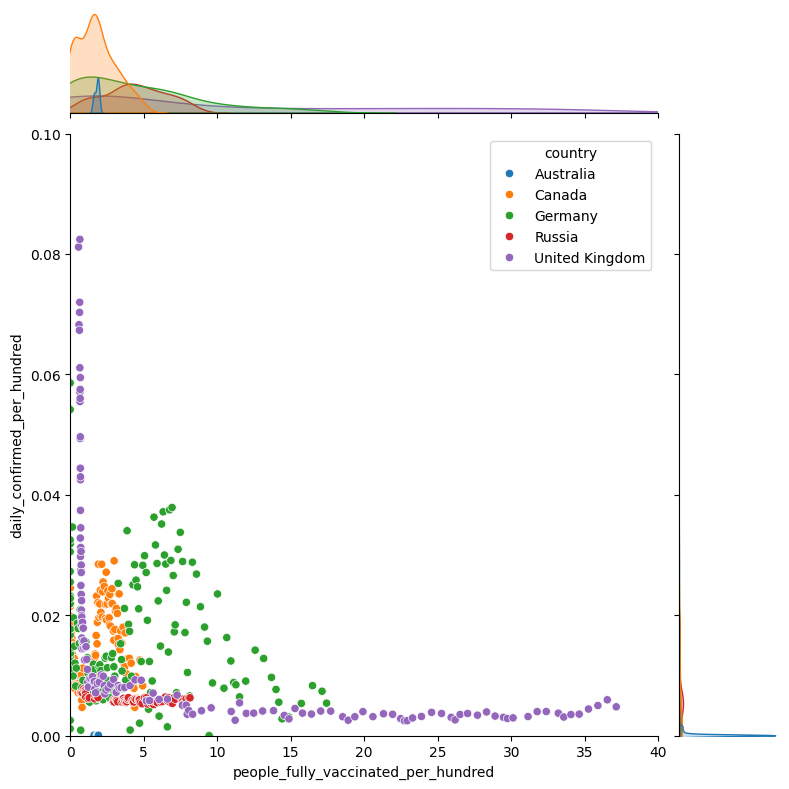

In [52]:
#Построим joinplot() - в котором совмещены 
#диаграмма рассеяния и гистограмма
joinplot = sns.jointplot(
    data=croped_covid_df,
    x='people_fully_vaccinated_per_hundred',
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height = 8
)

In [54]:
#Создадим сводную таблицу
pivot = croped_covid_df.pivot_table(
    values = 'people_vaccinated_per_hundred',
    columns = 'date',
    index = 'country'
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


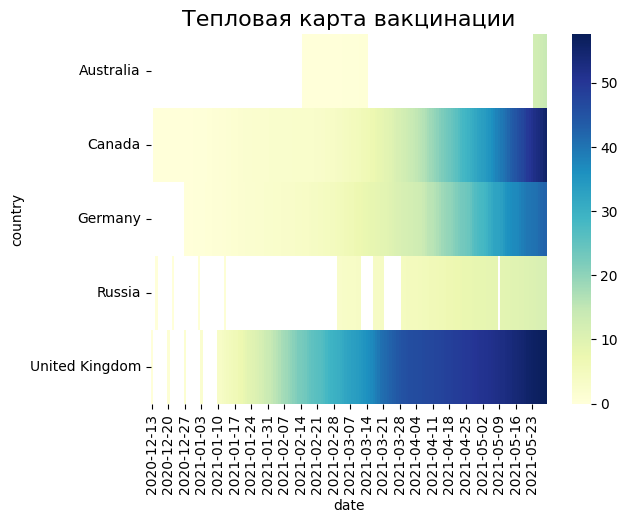

In [55]:
#Построим тепловую карту
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

### Задание 6.4

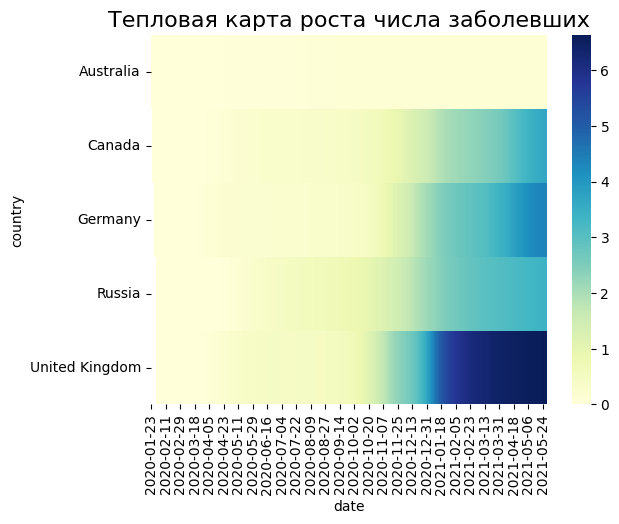

In [61]:
croped_covid_df['confirmed_per_hundred'] = (
    croped_covid_df['confirmed']/croped_covid_df['population']*100
)
pivot = croped_covid_df.pivot_table(
    values = 'confirmed_per_hundred',
    columns = 'date',
    index = 'country'
)
pivot.columns = pivot.columns.astype('string')
heatmap_confirmed_per_hundred = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap_confirmed_per_hundred.set_title('Тепловая карта роста числа заболевших',
fontsize=16);

### Задание 6.5

C:\Users\Андрей\AppData\Local\Temp\ipykernel_12952\1004874939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot_recovery_rate=sns.boxplot(


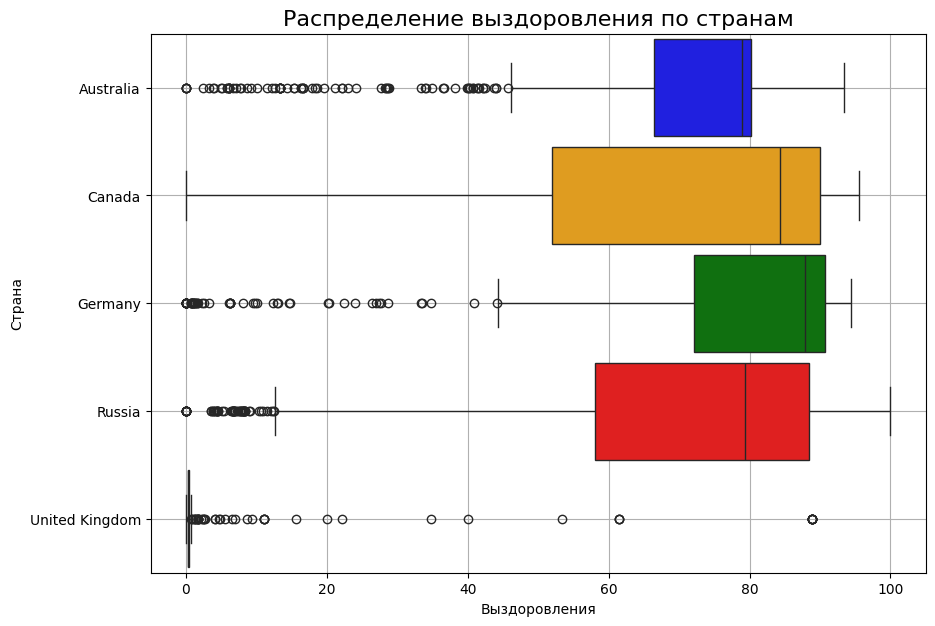

In [62]:
fig = plt.figure(figsize=(10,7))
boxplot_recovery_rate=sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9,
    palette=['blue', 'orange', 'green', 'red', 'purple']
)
boxplot_recovery_rate.set_title('Распределение выздоровления по странам', fontsize=16);
boxplot_recovery_rate.set_xlabel('Выздоровления');
boxplot_recovery_rate.set_ylabel('Страна');
boxplot_recovery_rate.grid()

### Графические возможности библиотеки Plotly